In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Analysis

In [2]:
# import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
# import data. Be careful for Date type, String type (factors in R).

train = pd.read_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/train.csv", sep=',', parse_dates=['Date'],
                    dtype={'StateHoliday': str, 'SchoolHoliday':str})

test = pd.read_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/test.csv", sep=",", index_col = 'Id', parse_dates=['Date'],
                  dtype={'StateHoliday': str, 'SchoolHoliday':str})

store = pd.read_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/store.csv", sep=",", dtype={'StoreType': str,
                                                      'Assortment': str,
                                                      'PromoInterval': str})

### 1) Train Dataset

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
train[train['Open'] == 0].Sales.describe()

count    172817.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Sales, dtype: float64

In [9]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
#train['Day'] = pd.DatetimeIndex(train['Date']).day

In [10]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [11]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
               'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
list(train.columns.values)
#print(train.head())

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [12]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
Sales                     int64
dtype: object

In [13]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [14]:
train["SchoolHoliday"].unique()

array(['1', '0'], dtype=object)

In [15]:
# It worked, now automatize the process.

def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [16]:
factor_to_integer(train, 'StateHoliday')

levels : [0 1 2 3] ; data type : int32


In [17]:
factor_to_integer(train, 'SchoolHoliday')

levels : [0 1] ; data type : int32


In [18]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int32
Sales                     int64
dtype: object

In [19]:
print(train.describe())

              Store     DayOfWeek          Year         Month     Customers  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  2.013832e+03  5.846762e+00  6.331459e+02   
std    3.219087e+02  1.997391e+00  7.773960e-01  3.326097e+00  4.644117e+02   
min    1.000000e+00  1.000000e+00  2.013000e+03  1.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  2.013000e+03  3.000000e+00  4.050000e+02   
50%    5.580000e+02  4.000000e+00  2.014000e+03  6.000000e+00  6.090000e+02   
75%    8.380000e+02  6.000000e+00  2.014000e+03  8.000000e+00  8.370000e+02   
max    1.115000e+03  7.000000e+00  2.015000e+03  1.200000e+01  7.388000e+03   

               Open         Promo  StateHoliday  SchoolHoliday         Sales  
count  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  1.017209e+06  
mean   8.301067e-01  3.815145e-01  4.516279e-02   8.213533e-01  5.773819e+03  
std    3.755392e-01  4.857586e-01  2.836559e-01   3

In [20]:
train['Open'].unique()

array([1, 0], dtype=int64)

In [21]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
               'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
list(train.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [22]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : train[colname].isnull().sum() for colname in train.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Customers', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0),
 ('Sales', 0)]

In [23]:
corMat = pd.DataFrame(train.loc[:, ['DayOfWeek', 'Sales', 'Month', 'Year', 'Customers', 'Promo',
                                    'StateHoliday', 'SchoolHoliday']].corr())
print(corMat)

               DayOfWeek     Sales     Month      Year  Customers     Promo  \
DayOfWeek       1.000000 -0.462125 -0.005362  0.001937  -0.386445 -0.392925   
Sales          -0.462125  1.000000  0.048768  0.023519   0.894711  0.452345   
Month          -0.005362  0.048768  1.000000 -0.269382   0.038179 -0.011747   
Year            0.001937  0.023519 -0.269382  1.000000  -0.001212  0.024300   
Customers      -0.386445  0.894711  0.038179 -0.001212   1.000000  0.316169   
Promo          -0.392925  0.452345 -0.011747  0.024300   0.316169  1.000000   
StateHoliday   -0.044265 -0.229029  0.038058 -0.005067  -0.204295 -0.024157   
SchoolHoliday   0.205388 -0.085124 -0.103282  0.036535  -0.071568 -0.067483   

               StateHoliday  SchoolHoliday  
DayOfWeek         -0.044265       0.205388  
Sales             -0.229029      -0.085124  
Month              0.038058      -0.103282  
Year              -0.005067       0.036535  
Customers         -0.204295      -0.071568  
Promo             

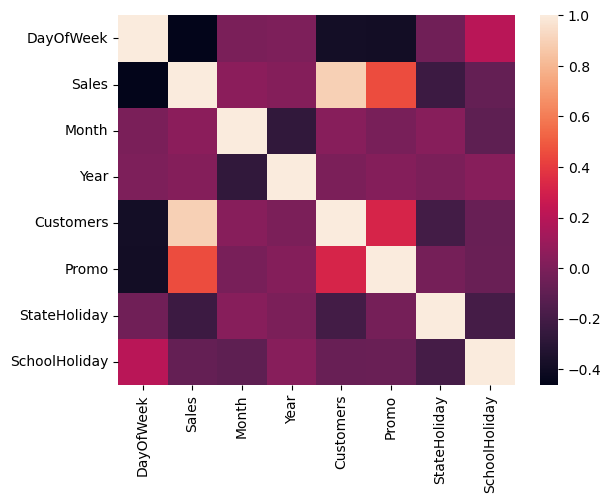

In [24]:
sns.heatmap(data=corMat)
plt.show()

### 2) Test Dataset

In [25]:
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
#test['Day'] = pd.DatetimeIndex(test['Date']).day

In [26]:
test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Id,,,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0,2015,9
2,3,4,2015-09-17,1.0,1,0,0,2015,9
3,7,4,2015-09-17,1.0,1,0,0,2015,9
4,8,4,2015-09-17,1.0,1,0,0,2015,9
5,9,4,2015-09-17,1.0,1,0,0,2015,9


In [27]:
test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
Year                      int64
Month                     int64
dtype: object

In [28]:
test['Open'].unique()

array([ 1., nan,  0.])

In [29]:
sum(test['Open'] == 0)

5984

In [30]:
sum(test['Open'] == 1)

35093

In [31]:
sum(test['Open'].isnull())

11

In [32]:
test = test[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open',
             'Promo', 'StateHoliday', 'SchoolHoliday']]
list(test.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [33]:
test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
dtype: object

In [34]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Open', 11),
 ('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [35]:
print(test[np.isnan(test['Open'])])

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
Id                                                                          
480      622          4 2015-09-17  2015      9   NaN      1            0   
1336     622          3 2015-09-16  2015      9   NaN      1            0   
2192     622          2 2015-09-15  2015      9   NaN      1            0   
3048     622          1 2015-09-14  2015      9   NaN      1            0   
4760     622          6 2015-09-12  2015      9   NaN      0            0   
5616     622          5 2015-09-11  2015      9   NaN      0            0   
6472     622          4 2015-09-10  2015      9   NaN      0            0   
7328     622          3 2015-09-09  2015      9   NaN      0            0   
8184     622          2 2015-09-08  2015      9   NaN      0            0   
9040     622          1 2015-09-07  2015      9   NaN      0            0   
10752    622          6 2015-09-05  2015      9   NaN      0            0   

In [36]:
print(train.loc[train['Store'] == 622].head())

      Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
621     622          5 2015-07-31  2015      7        540     1      1   
1736    622          4 2015-07-30  2015      7        406     1      1   
2851    622          3 2015-07-29  2015      7        468     1      1   
3966    622          2 2015-07-28  2015      7        417     1      1   
5081    622          1 2015-07-27  2015      7        517     1      1   

      StateHoliday  SchoolHoliday  Sales  
621              0              0   6306  
1736             0              0   5412  
2851             0              0   5326  
3966             0              0   4966  
5081             0              0   5413  


In [37]:
train[np.isnan(train['Open'])]

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales


In [38]:
test.loc[np.isnan(test['Open']), 'Open'] = 1

In [39]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [40]:
test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
dtype: object

In [41]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [42]:
test['SchoolHoliday'].unique()

array(['0', '1'], dtype=object)

In [43]:
factor_to_integer(test, 'StateHoliday')
factor_to_integer(test, 'SchoolHoliday')
test.dtypes

levels : [0 1] ; data type : int32
levels : [0 1] ; data type : int32


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int32
dtype: object

In [44]:
train.loc[train['StateHoliday'] > 1].shape

(10790, 11)

In [45]:
##Because only StateHoliday 0 and 1 exist in test dataset, we should consider deleting the rows in train dataset that 
##the StateHoliday value is different than 0 or 1.

In [46]:
train = train.loc[train['StateHoliday'] < 2]

In [47]:
train.loc[train['StateHoliday'] > 1].shape

(0, 11)

In [48]:
train.describe()

,Store,DayOfWeek,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
count,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06,1.006419e+06
mean,5.584296e+02,4.005149e+00,2.013833e+03,5.835079e+00,6.395803e+02,8.387918e-01,3.822811e-01,2.013078e-02,8.296783e-01,5.833609e+03
std,3.219086e+02,1.999261e+00,7.775718e-01,3.316515e+00,4.617824e+02,3.677231e-01,4.859450e-01,1.404477e-01,3.759154e-01,3.822671e+03
min,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2.013000e+03,3.000000e+00,4.140000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.814000e+03
50%,5.580000e+02,4.000000e+00,2.014000e+03,6.000000e+00,6.140000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.781000e+03
75%,8.380000e+02,6.000000e+00,2.014000e+03,8.000000e+00,8.400000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,7.883000e+03
max,1.115000e+03,7.000000e+00,2.015000e+03,1.200000e+01,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.155100e+04


### 3) Store Dataset

In [49]:
store.shape

(1115, 10)

In [50]:
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [51]:
print(store.tail())

      Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113  

In [52]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Promo2SinceWeek', 544),
 ('Promo2SinceYear', 544),
 ('PromoInterval', 544),
 ('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0)]

In [53]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [54]:
store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [55]:
store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [56]:
store.loc[store['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [57]:
store.loc[store['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].tail()

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1107,0.0,0.0,0
1109,0.0,0.0,0
1111,0.0,0.0,0
1112,0.0,0.0,0
1113,0.0,0.0,0


In [58]:
#Since we want the duration not the value (Year, Week) we do the max minus the current value

In [59]:
store.loc[store['Promo2'] != 0, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceWeek']

In [60]:
store.loc[store['Promo2'] != 0, 'Promo2SinceYear'] = store['Promo2SinceYear'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceYear']

In [61]:
store.loc[store['Promo2'] == 1, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].tail()

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,19.0,2.0,"Jan,Apr,Jul,Oct"
1106,37.0,5.0,"Jan,Apr,Jul,Oct"
1108,28.0,3.0,"Jan,Apr,Jul,Oct"
1110,19.0,2.0,"Jan,Apr,Jul,Oct"
1114,28.0,3.0,"Mar,Jun,Sept,Dec"


In [62]:
factor_to_integer(store, 'PromoInterval', start_value=0)

levels : [0 1 2 3] ; data type : int32


In [63]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [64]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [65]:
store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [66]:
factor_to_integer(store, 'StoreType')
factor_to_integer(store, 'Assortment')
store.dtypes

levels : [0 1 2 3] ; data type : int32
levels : [0 1 2] ; data type : int32


Store                          int64
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [67]:
print(store.head())

   Store  StoreType  Assortment  CompetitionDistance  \
0      1          0           0               1270.0   
1      2          1           0                570.0   
2      3          1           0              14130.0   
3      4          0           1                620.0   
4      5          1           0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0              0.0              0.0              0  
1             37.0              5.0              1  
2             36.0              4.0              1  
3              0.0              0.0              0  
4

In [68]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [69]:
#we replace naan with average not 0 because Column may already have 0 and rows with 0s and they can be shuffled

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(store)
store_imputed = imputer.transform(store)

In [71]:
store2 = pd.DataFrame(store_imputed, columns=store.columns.values)

In [72]:
store2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111.0,1.0,0.0,1900.0,6.000000,2014.000000,1.0,19.0,2.0,1.0
1111,1112.0,0.0,1.0,1880.0,4.000000,2006.000000,0.0,0.0,0.0,0.0
1112,1113.0,1.0,1.0,9260.0,7.224704,2008.668857,0.0,0.0,0.0,0.0
1113,1114.0,1.0,1.0,870.0,7.224704,2008.668857,0.0,0.0,0.0,0.0
1114,1115.0,2.0,1.0,5350.0,7.224704,2008.668857,1.0,28.0,3.0,3.0


In [73]:
store2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,570.0,11.0,2007.0,1.0,37.0,5.0,1.0
2,3.0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0
3,4.0,0.0,1.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,29910.0,4.0,2015.0,0.0,0.0,0.0,0.0


In [74]:
store2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [75]:
store2.shape

(1115, 10)

In [76]:
store.shape

(1115, 10)

In [77]:
#same as for promotions

In [78]:
store2['CompetitionOpenSinceMonth'] = store2['CompetitionOpenSinceMonth'].max() - store2['CompetitionOpenSinceMonth']

In [79]:
store2['CompetitionOpenSinceYear'] = store2['CompetitionOpenSinceYear'].max() - store2['CompetitionOpenSinceYear']

In [80]:
train.head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,2015-07-31,2015,7,555,1,1,0,0,5263
1,2,5,2015-07-31,2015,7,625,1,1,0,0,6064
2,3,5,2015-07-31,2015,7,821,1,1,0,0,8314
3,4,5,2015-07-31,2015,7,1498,1,1,0,0,13995
4,5,5,2015-07-31,2015,7,559,1,1,0,0,4822


In [81]:
store2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0
2,3.0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,4.0,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0


In [82]:
len(store2['Store']) -sum(store2['Store'].isin(train['Store']))

0

In [83]:
# Checking if there are additional (unnecessary) stores in "train" data. No difference at all!

In [84]:
StoreStore = pd.Series(store2['Store']); StoreTrain = pd.Series(train['Store'])

sum(StoreTrain.isin(StoreStore) == False)

0

In [85]:
# Merge train and store datasets before modeling the data the merge is done according to the store

In [86]:
train_store = pd.merge(train, store2, how = 'left', on='Store')

In [87]:
train_store.head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,555,1,1,0,0,5263,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1,2,5,2015-07-31,2015,7,625,1,1,0,0,6064,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0
2,3,5,2015-07-31,2015,7,821,1,1,0,0,8314,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,4,5,2015-07-31,2015,7,1498,1,1,0,0,13995,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0
4,5,5,2015-07-31,2015,7,559,1,1,0,0,4822,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0


In [88]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Year                         0
Month                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Sales                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [89]:
#Merge test and store datasets and check the result

In [90]:
test_store = test.reset_index().merge(store2, how = 'left', on='Store').set_index('Id')

In [91]:
print(train_store.head())

   Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
0      1          5 2015-07-31  2015      7        555     1      1   
1      2          5 2015-07-31  2015      7        625     1      1   
2      3          5 2015-07-31  2015      7        821     1      1   
3      4          5 2015-07-31  2015      7       1498     1      1   
4      5          5 2015-07-31  2015      7        559     1      1   

   StateHoliday  SchoolHoliday  Sales  StoreType  Assortment  \
0             0              0   5263        0.0         0.0   
1             0              0   6064        1.0         0.0   
2             0              0   8314        1.0         0.0   
3             0              0  13995        0.0         1.0   
4             0              0   4822        1.0         0.0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        3.0                       7.0   
1                570.0        

In [92]:
print(test_store.head())

    Store  DayOfWeek       Date  Year  Month  Open  Promo  StateHoliday  \
Id                                                                        
1       1          4 2015-09-17  2015      9   1.0      1             0   
2       3          4 2015-09-17  2015      9   1.0      1             0   
3       7          4 2015-09-17  2015      9   1.0      1             0   
4       8          4 2015-09-17  2015      9   1.0      1             0   
5       9          4 2015-09-17  2015      9   1.0      1             0   

    SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Id                                                              
1               0        0.0         0.0               1270.0   
2               0        1.0         0.0              14130.0   
3               0        1.0         1.0              24000.0   
4               0        1.0         0.0               7520.0   
5               0        1.0         1.0               2030.0   

    CompetitionOpe

In [93]:
print(test_store.tail())

       Store  DayOfWeek       Date  Year  Month  Open  Promo  StateHoliday  \
Id                                                                           
41084   1111          6 2015-08-01  2015      8   1.0      0             0   
41085   1112          6 2015-08-01  2015      8   1.0      0             0   
41086   1113          6 2015-08-01  2015      8   1.0      0             0   
41087   1114          6 2015-08-01  2015      8   1.0      0             0   
41088   1115          6 2015-08-01  2015      8   1.0      0             0   

       SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Id                                                                 
41084              0        1.0         0.0               1900.0   
41085              0        0.0         1.0               1880.0   
41086              0        1.0         1.0               9260.0   
41087              0        1.0         1.0                870.0   
41088              1        2.0         1.0  

In [94]:
test_store.shape

(41088, 18)

In [95]:
test_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Year                         0
Month                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Visual Exploration

Sales by Year

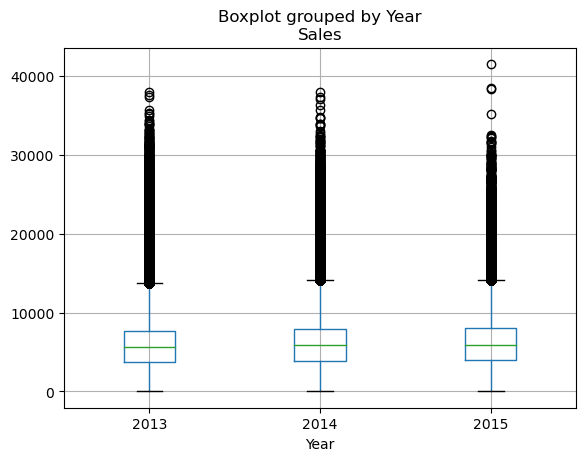

In [96]:
train_store.boxplot(column='Sales', by='Year')
plt.show()

Sales by Month

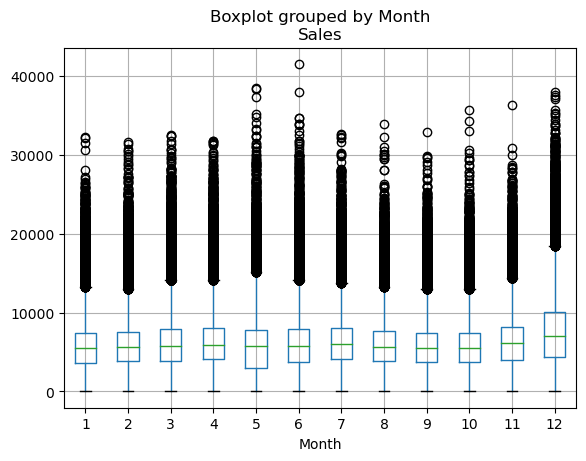

In [97]:
train_store.boxplot(column='Sales', by='Month')
plt.show()

<AxesSubplot:title={'center':'Month vs.Sales'}, xlabel='Month', ylabel='Sales'>

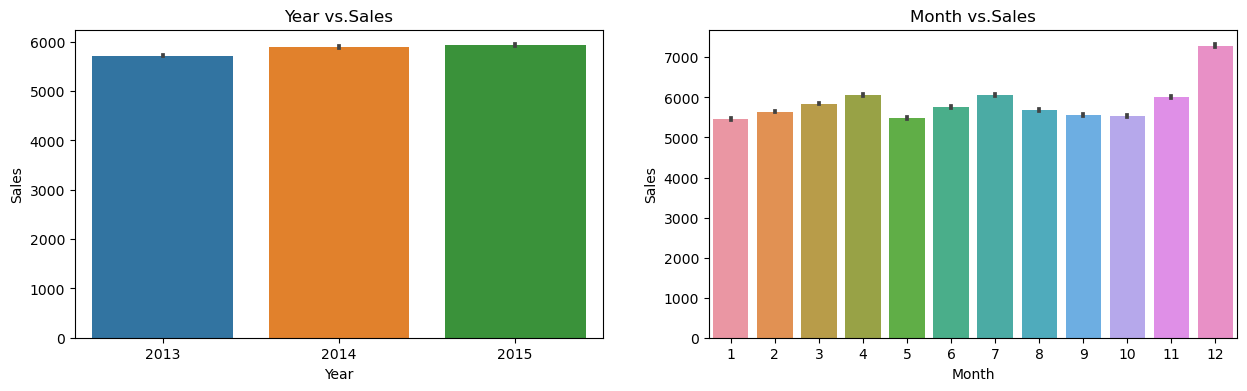

In [98]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.title.set_text('Year vs.Sales')
axis2.title.set_text('Month vs.Sales')
sns.barplot(x='Year', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='Month', y='Sales', data=train_store, ax=axis2)

Sales by StateHoliday and SchoolHoliday

<AxesSubplot:title={'center':'SchoolHoliday vs.Sales'}, xlabel='SchoolHoliday', ylabel='Sales'>

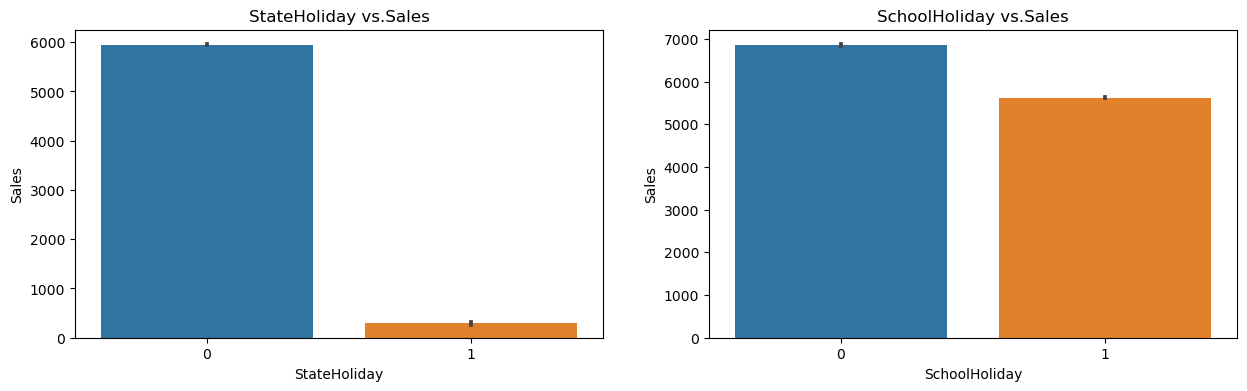

In [99]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.title.set_text('StateHoliday vs.Sales')
axis2.title.set_text('SchoolHoliday vs.Sales')
sns.barplot(x='StateHoliday', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Sales', data=train_store, ax=axis2)

<AxesSubplot:title={'center':'DayofWeek vs.Sales'}, xlabel='DayOfWeek', ylabel='Sales'>

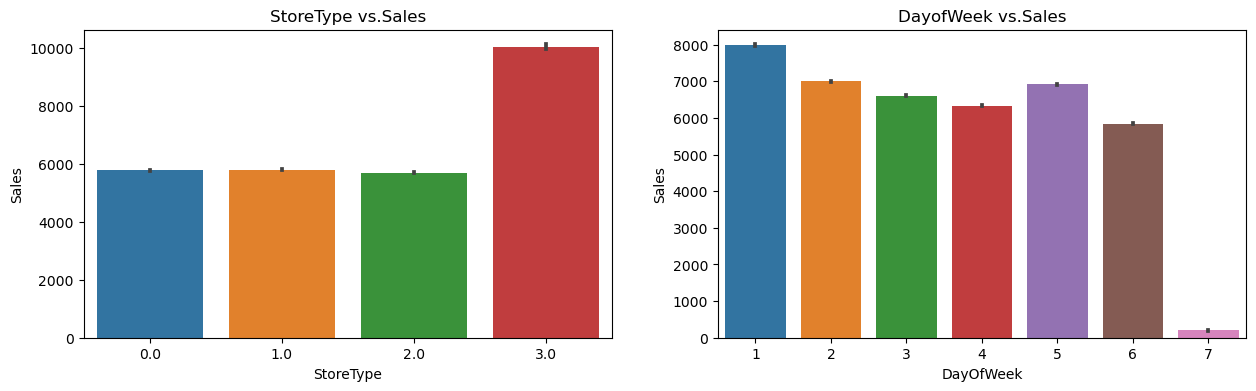

In [100]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.title.set_text('StoreType vs.Sales')
axis2.title.set_text('DayofWeek vs.Sales')
sns.barplot(x='StoreType', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='DayOfWeek', y='Sales', data=train_store, ax=axis2)

<AxesSubplot:title={'center':'Promo2SinceYear vs.Sales'}, xlabel='Promo2SinceYear', ylabel='Sales'>

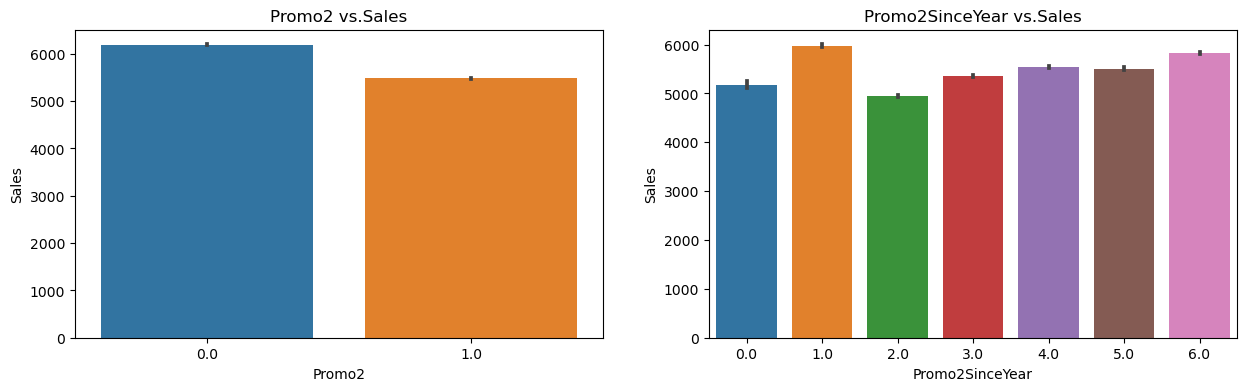

In [101]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.title.set_text('Promo2 vs.Sales')
axis2.title.set_text('Promo2SinceYear vs.Sales')
sns.barplot(x='Promo2', y='Sales', data=train_store, ax=axis1)
sns.barplot(x='Promo2SinceYear', y='Sales', data=train_store.loc[train_store['Promo2'] != 0], ax=axis2)

Sales & years

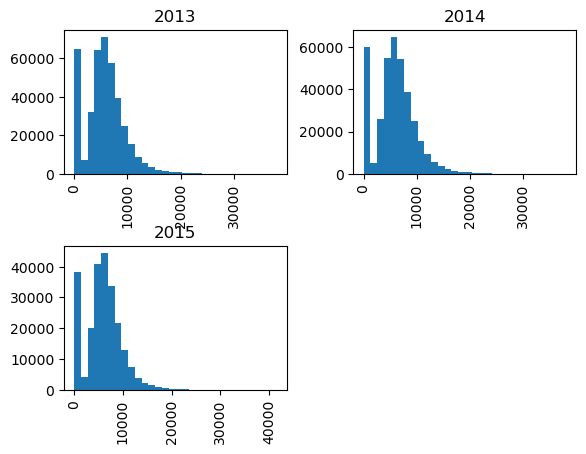

In [102]:
train_store.hist(column='Sales', by='Year', bins=30)
plt.show()

Sales & months

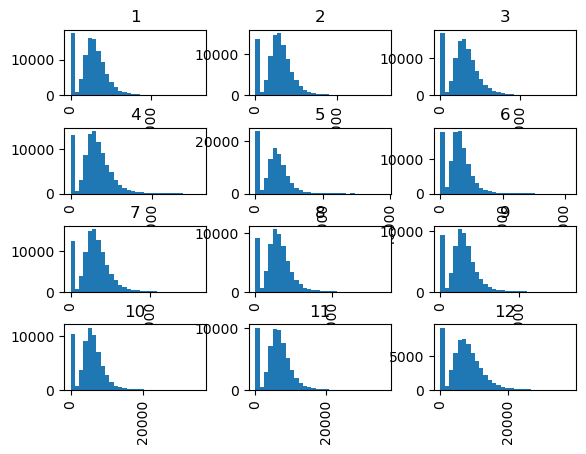

In [103]:
train_store.hist(column='Sales', by='Month', bins=30)
plt.show()

Effect of distance of the nearest store

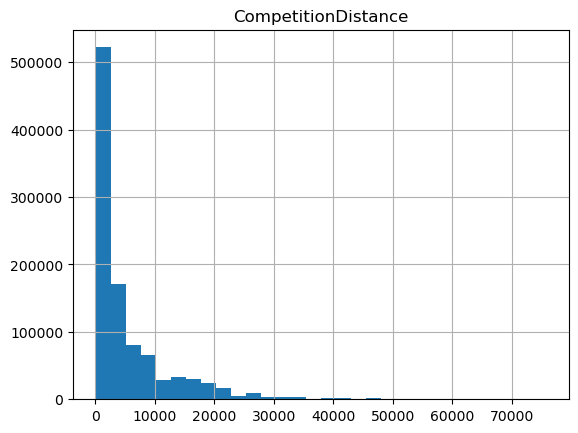

In [104]:
train_store.hist(column='CompetitionDistance', bins=30)
plt.show()

### MODELING

In [105]:
train_store.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], dtype=object)

In [106]:
test_store.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], dtype=object)

In [107]:
train_model = train_store.drop(['Customers', 'Date'], axis=1)
train_model['Year'] = train_model['Year'].max() - train_model['Year']
print(train_model.head())

   Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
0      1          5     0      7     1      1             0              0   
1      2          5     0      7     1      1             0              0   
2      3          5     0      7     1      1             0              0   
3      4          5     0      7     1      1             0              0   
4      5          5     0      7     1      1             0              0   

   Sales  StoreType  Assortment  CompetitionDistance  \
0   5263        0.0         0.0               1270.0   
1   6064        1.0         0.0                570.0   
2   8314        1.0         0.0              14130.0   
3  13995        0.0         1.0                620.0   
4   4822        1.0         0.0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        3.0                       7.0     0.0   
1                        1.0                       8.0     1.0

In [108]:
test_model = test_store.drop(['Date'], axis=1)
test_model['Year'] = test_model['Year'].max() - test_model['Year']
print(test_model.head())

    Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
Id                                                                            
1       1          4     0      9   1.0      1             0              0   
2       3          4     0      9   1.0      1             0              0   
3       7          4     0      9   1.0      1             0              0   
4       8          4     0      9   1.0      1             0              0   
5       9          4     0      9   1.0      1             0              0   

    StoreType  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Id                                                                          
1         0.0         0.0               1270.0                        3.0   
2         1.0         0.0              14130.0                        0.0   
3         1.0         1.0              24000.0                        8.0   
4         1.0         0.0               7520.0               

In [109]:
test_model_open = test_model.loc[test_model['Open'] == 1]
test_model_open = test_model_open.drop('Open', axis=1)

test_model_close = test_model.loc[test_model['Open'] == 0]

test_model_open.head()

,Store,DayOfWeek,Year,Month,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,
1,1,4,0,9,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
2,3,4,0,9,1,0,0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,7,4,0,9,1,0,0,1.0,1.0,24000.0,8.0,2.0,0.0,0.0,0.0,0.0
4,8,4,0,9,1,0,0,1.0,0.0,7520.0,2.0,1.0,0.0,0.0,0.0,0.0
5,9,4,0,9,1,0,0,1.0,1.0,2030.0,4.0,15.0,0.0,0.0,0.0,0.0


In [110]:
test_model_open.isnull().sum()

Store                        0
DayOfWeek                    0
Year                         0
Month                        0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X = train_model.drop('Sales', axis=1)
y = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                                  columns=X_train.columns.values)

X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                                  columns=X_train.columns.values)

In [113]:
X_train2 = X_train
X_train2 = X_train2.drop('CompetitionOpenSinceYear', axis=1)

X_test2 = X_test

X_test2 = X_test2.drop('CompetitionOpenSinceYear', axis=1)

test_model2 = test_model

test_model2 = test_model2.drop('CompetitionOpenSinceYear', axis=1)

In [114]:
X_train2.shape

(754814, 16)

In [115]:
X_train.shape

(754814, 17)

### Linear regression

In [116]:
#training the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
 
print('The performance of the model on the test basis')
print('--------------------------------------')
print('The root mean square error is{}'.format(rmse))
print('the R2 score is {}'.format(r2))

Y_test_RL_predict = lmodellineaire.predict(test_model)

The performance of the model on the test basis
--------------------------------------
The root mean square error is2567.8529327012793
the R2 score is 0.5481249282273073


In [117]:
print(Y_test_RL_predict)

[8450.48922873 7428.45173925 8827.30708407 ... 6686.88850552 6903.77607222
 5729.59138816]


### RandomForest

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [119]:
rf.score(X_test, y_test)

0.9309878901247606

In [120]:
Y_test_RF_predict = rf.predict(test_model)
print(Y_test_RF_predict)

[ 4458.865       8169.96433333 11102.9647619  ...  5649.45283333
 21400.11482937  7077.49245238]


### Decission Tree

In [121]:
#Fitting Decision Tree Regressor to the training set  
from sklearn.tree import DecisionTreeRegressor
classifier= DecisionTreeRegressor(random_state=44)  
classifier.fit(X_train2, y_train)  
classifier.score(X_test2,y_test)

0.9032111551373231

In [122]:
Y_test_DT_predict = classifier.predict(test_model2)  
print(Y_test_DT_predict)

[ 4346.          8977.         11374.5        ...  5173.33333333
 21192.25        7108.33333333]


In [123]:
test_model['Sales'] = Y_test_RL_predict
submission1 = test_model['Sales']
submission1 = submission1.reset_index()

#test_store = test.reset_index().merge(store2, how = 'left', on='Store').set_index('Id')

In [124]:
test_model = test_model.drop(['Sales'], axis=1)

In [125]:
test_model['Sales'] = Y_test_RF_predict
submission2 = test_model['Sales']
submission2 = submission2.reset_index()

In [126]:
test_model = test_model.drop(['Sales'], axis=1)

In [127]:
test_model['Sales'] = Y_test_DT_predict
submission3 = test_model['Sales']
submission3 = submission3.reset_index()

In [128]:
test_model = test_model.drop(['Sales'], axis=1)

In [129]:
submission1.tail()

,Id,Sales
41083,41084,5790.478896
41084,41085,6867.171063
41085,41086,6686.888506
41086,41087,6903.776072
41087,41088,5729.591388


In [130]:
submission2.tail()

,Id,Sales
41083,41084,2635.262607
41084,41085,6940.143500
41085,41086,5649.452833
41086,41087,21400.114829
41087,41088,7077.492452


In [131]:
submission3.tail()

,Id,Sales
41083,41084,2619.000000
41084,41085,6411.500000
41085,41086,5173.333333
41086,41087,21192.250000
41087,41088,7108.333333


In [132]:
submission1.to_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/submission_open1.csv", sep=',', index=False)

In [133]:
submission2.to_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/submission_open2.csv", sep=',', index=False)

In [134]:
submission3.to_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/submission_open3.csv", sep=',', index=False)

In [135]:
train_model.to_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/train_model.csv", sep=',', index=False)

In [136]:
test_model.reset_index().to_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Rossman Store Sales\Dataset/test_model.csv", sep=',', index=False)